# Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 단순 선형 회귀

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) #전체 데이터 학습

LinearRegression()

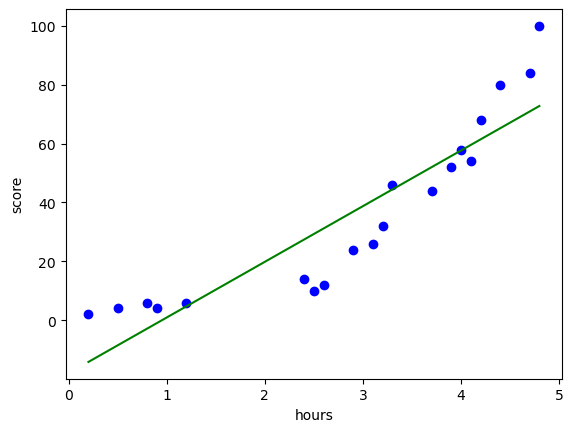

In [4]:
plt.scatter(X,y,color='blue')
plt.plot(X,reg.predict(X), color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [5]:
reg.score(X,y)

0.8169296513411765

## 다항 회귀(Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #2차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly[:5] #[x] -> [x^0, x^1, x^2], x가 3이라면 [1,3,9]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [7]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) #변환된 X와 y를 가지고 모델 생성

LinearRegression()

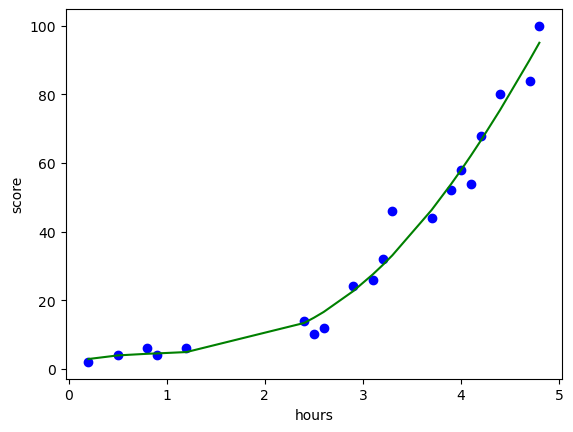

In [9]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [10]:
X_range = np.arange(min(X),max(X),0.1) #X의 최소값과 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생성

/var/folders/l5/_d7slpkx5bn04y8lk24k5l040000gn/T/ipykernel_61823/2909193814.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X),max(X),0.1) #X의 최소값과 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생성


In [11]:
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [12]:
X_range = X_range.reshape(-1,1)  #row 개수는 자동 계산, column 개수는 1개
X_range.shape

(46, 1)

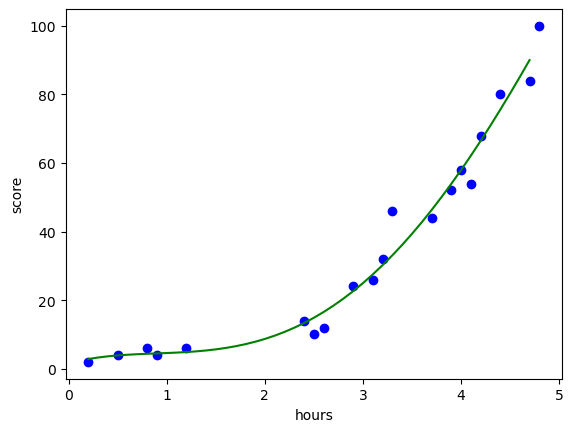

In [13]:
plt.scatter(X,y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 예측

In [14]:
reg.predict([[2]]) #선형회귀 모델의 예측값

array([19.85348988])

In [15]:
lin_reg.predict(poly_reg.fit_transform([[2]])) #다항 회귀 모델의 예측값

array([8.70559135])

In [17]:
lin_reg.score(X_poly,y)

0.9782775579000045